In [2]:
# Install wizmap
#%pip install --upgrade wizmap umap-learn
#%pip install sentence-transformers

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/75/0c/0bbbf03748c3c7c69f41f016b14cbee946cbd8880d0fb91a05c6f7b7a176/sentence_transformers-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.38.0 from https://files.pythonhosted.org/packages/f9/9d/030cc1b3e88172967e22ee1d012e0d5e0384eb70d2a098d1669d549aea29/transformers-4.45.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 44.4/44.4 kB 2.3 MB/s eta 0:00:00
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/5a/6a/775b93d6888c31f1f1fc457e4f5cc89f0984412d5dcdef792b8f2aa6e812/torch-2.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for huggingface-hub>=0.19.3 from https://files.pythonhosted.org/packages/64/09/a535946bf2dc88e61341f39dc507530411bb3ea4eac493e5ec833e8f35bd/huggingfa

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.9.0 which is incompatible.


In [1]:
from glob import glob
from os.path import exists, join, basename

from json import load, dump
from matplotlib import pyplot as plt
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from quadtreed3 import Quadtree, Node
from scipy.sparse import csr_matrix
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
from typing import Tuple
from io import BytesIO
from umap import UMAP
from sentence_transformers import SentenceTransformer

import pandas as pd
import numpy as np
import ndjson
import requests
import urllib
import wizmap

SEED = 20230501

plt.rcParams['figure.dpi'] = 300
file_path = r'C:\Users\brook\Downloads\pixel9\bundle.txt'

In [2]:
# Load  dataset
#read lines from file
tiktoks = [] 
linenum = 1
with open(file_path, 'r') as file:
    for line in file:
        # Strip any leading/trailing whitespace
        line = line.strip()
        
        # Split the line by colon
        parts = line.split(':')
        
        # Check if there are at least three parts
        if len(parts) > 2:
            # Append the third part to the tiktoks list
            tiktoks.append(parts[2].strip())
        linenum += 1


print('Loaded', len(tiktoks), 'tiktok sentences')

Loaded 707 tiktok sentences


In [3]:
print(f"processing text...{len(tiktoks)} rows")
    # # Load the pre-trained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

BATCH_SIZE = 128
embeddings = model.encode(tiktoks, batch_size=BATCH_SIZE, show_progress_bar=True)
reducer = UMAP(metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)
xs = embeddings_2d[:, 0].astype(float).tolist()
ys = embeddings_2d[:, 1].astype(float).tolist()
data_list = wizmap.generate_data_list(xs, ys, tiktoks)
grid_dict = wizmap.generate_grid_dict(xs, ys, tiktoks, 'text')
wizmap.save_json_files(data_list, grid_dict, data_json_name='data.ndjson', grid_json_name='grid.json')

processing text...707 rows


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Start generating data list...
Start generating contours...
Start generating multi-level summaries...


707it [00:00, 353694.29it/s]
100%|██████████| 5/5 [00:00<00:00, 27.47it/s]


In [4]:
#python -m http.server 3200 
data_url = 'http://localhost:3200/data.ndjson'
grid_url = 'http://localhost:3200/grid.json'


In [5]:
# Assuming tiktoks is your list of TikTok sentences
tiktoks_with_camera = [tiktok for tiktok in tiktoks if 'camera' in tiktok.lower()]

# Count the number of TikToks with the word "camera"
count_camera = len(tiktoks_with_camera)

print(f"Number of TikToks containing the word 'camera': {count_camera}")

Number of TikToks containing the word 'camera': 49


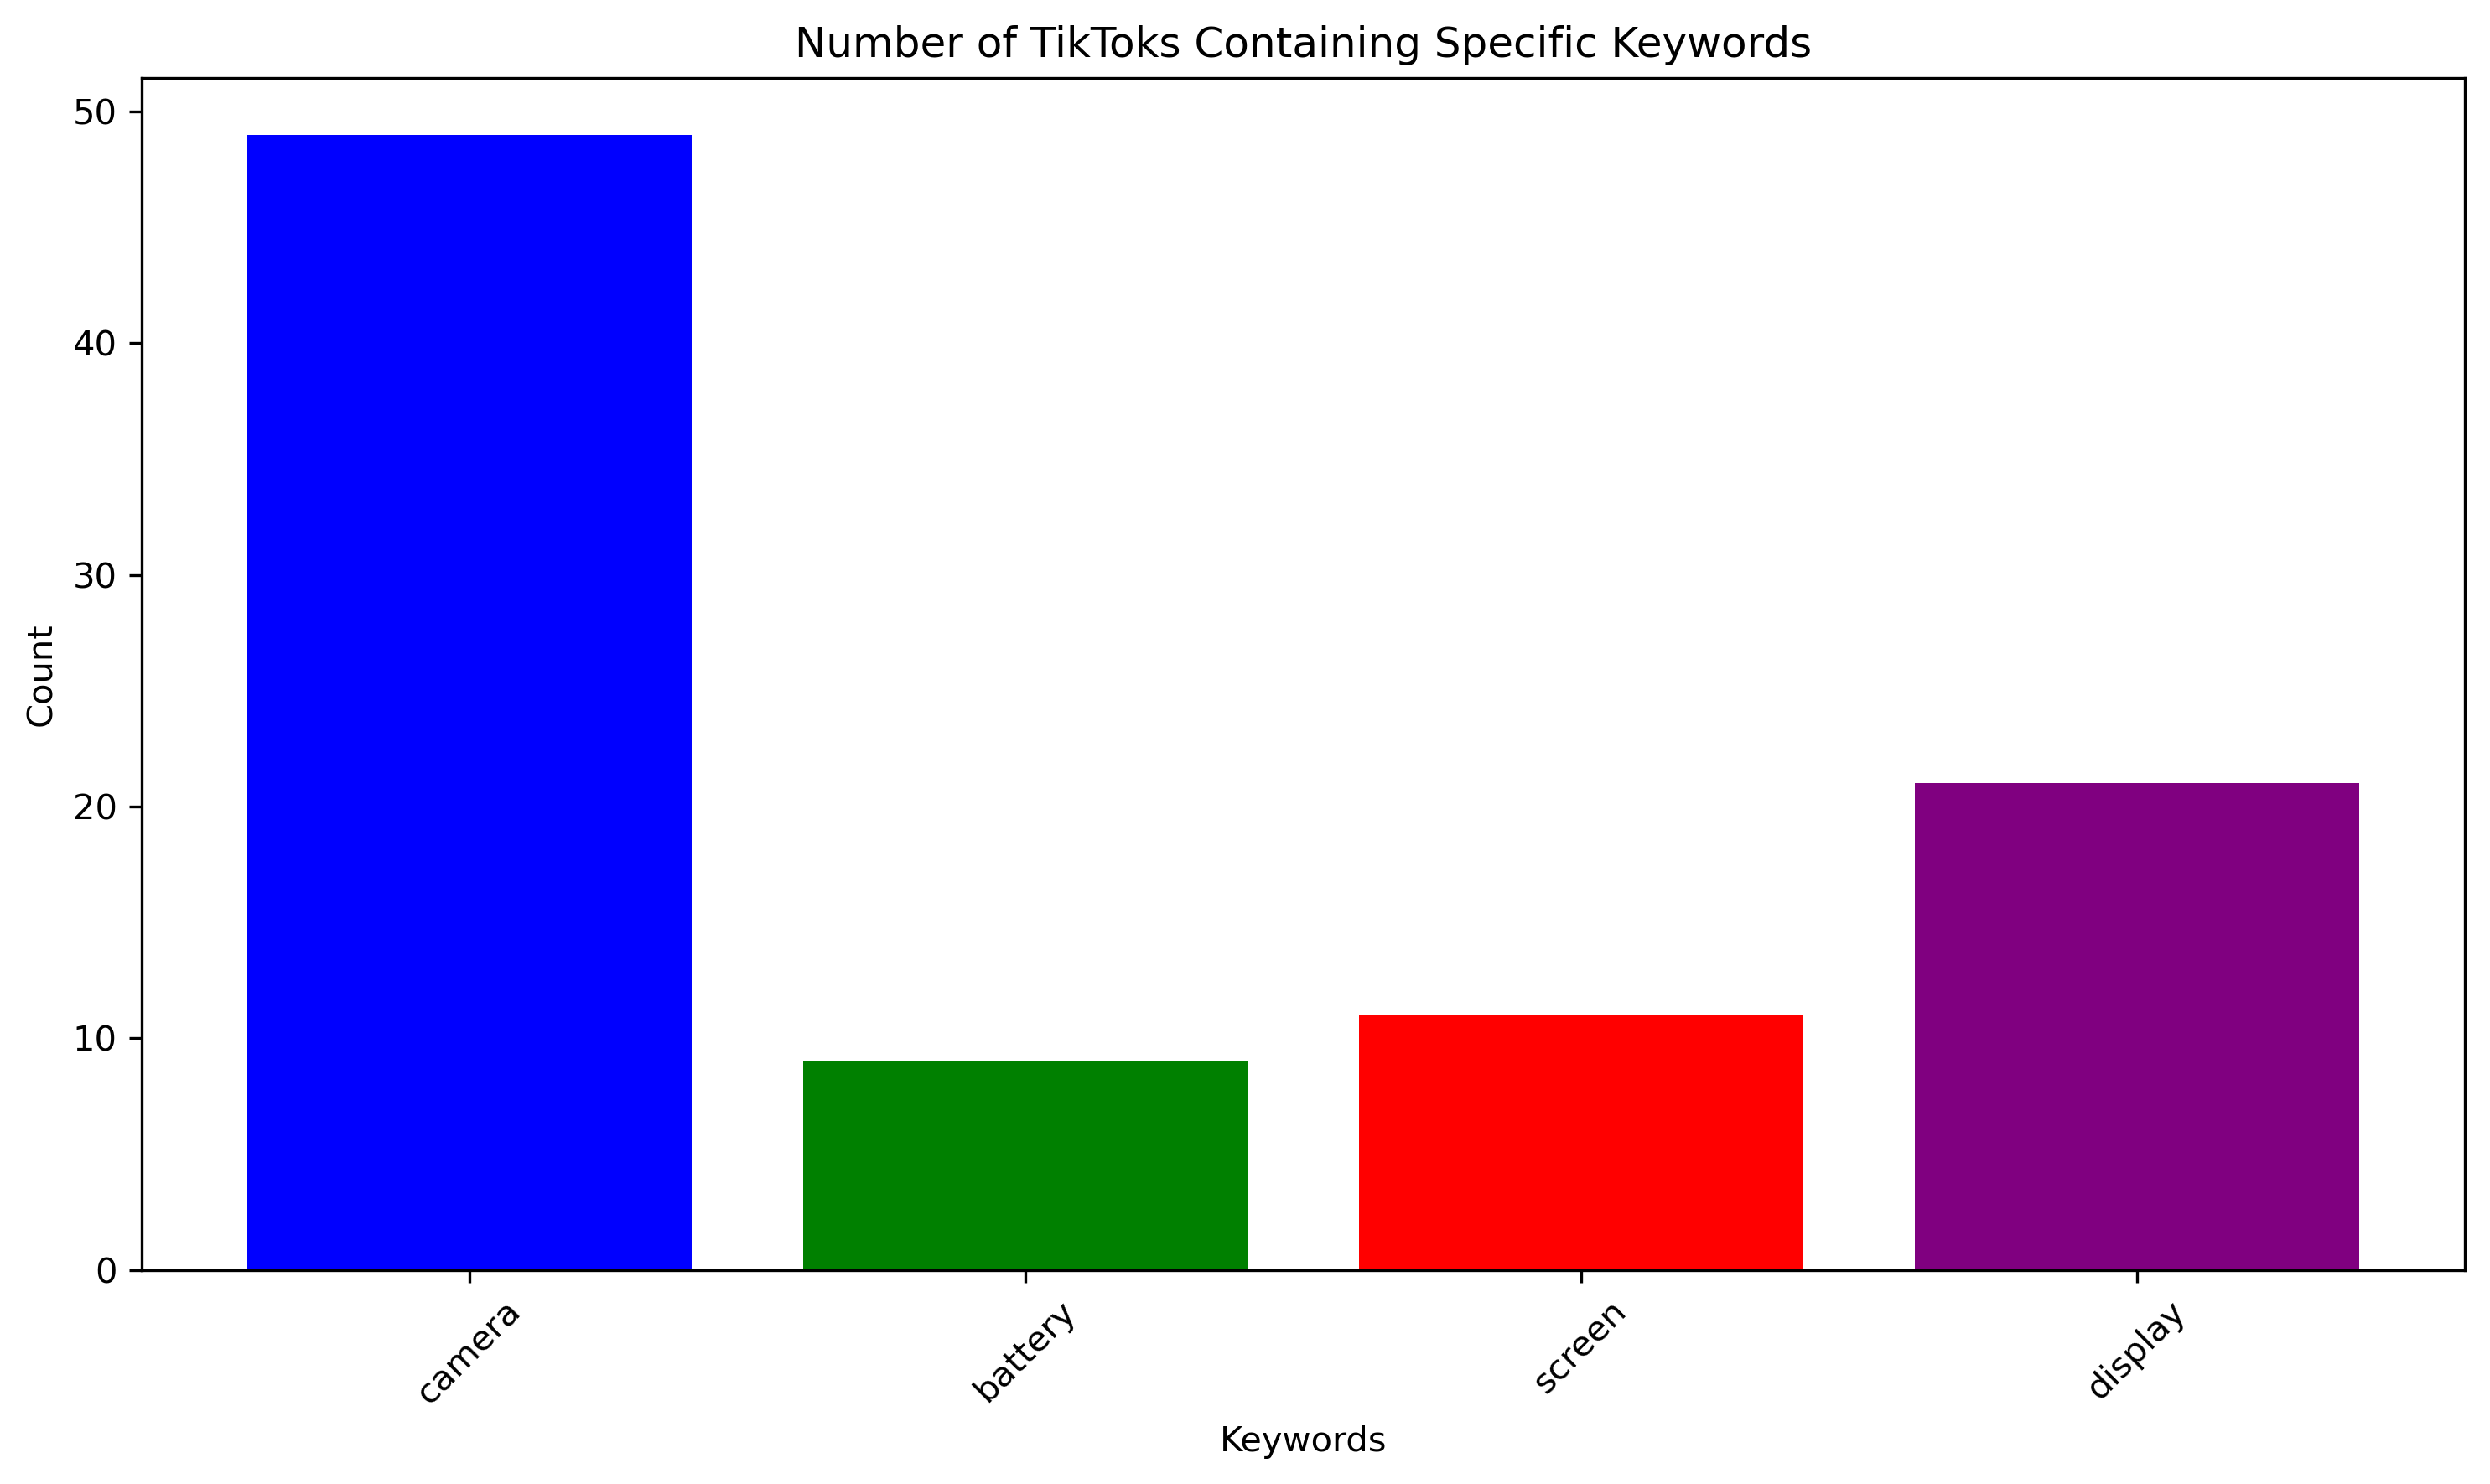

In [6]:
import matplotlib.pyplot as plt

# Assuming tiktoks is your list of TikTok sentences
keywords = ['camera', 'battery', 'screen', 'display']
counts = {keyword: 0 for keyword in keywords}

# Count occurrences of each keyword
for tiktok in tiktoks:
    for keyword in keywords:
        if keyword in tiktok.lower():
            counts[keyword] += 1

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Number of TikToks Containing Specific Keywords')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()